In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'AMD', 'AMZN', 'ANET', 'APPH', 'AXON',
    'BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD', 'DDOG', 'DKNG',
    'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'FUV', 'FVRR', 'GH', 'GMED',
    'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU','MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NVCR', 'NVDA', 'NYT', 'OKTA', 'OPEN', 'PANW',
    'PINS', 'PTON', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'ROKU', 'SE',
    'SOLO', 'SPLK', 'SQ', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

73

In [3]:
N_YEARS = 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2017-02-26', datetime.date(2022, 2, 26))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  76 of 76 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADSK
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BBY
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...EVGO
   ...FLGT
   ...FTCH
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MEDP
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...SOLO
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

1255   2022-02-18
1256   2022-02-22
1257   2022-02-23
1258   2022-02-24
1259   2022-02-25
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.997422
2       1.013674
3       0.994140
4       1.000504
5       0.996723
          ...   
1255    0.992834
1256    0.989857
1257    0.981588
1258    1.014957
1259    1.022373
Name: ^GSPC, Length: 1259, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,0.996046
2,1.020833
3,1.000335
4,1.004017
5,0.996723
...,...
1255,0.988783
1256,0.999623
1257,0.984963
1258,1.081575


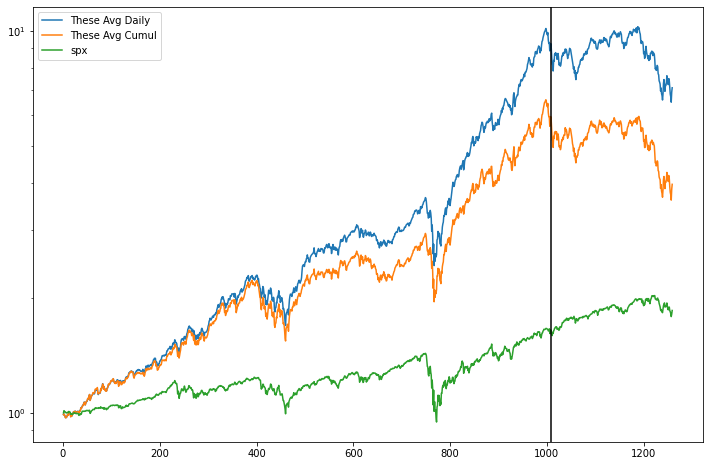

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

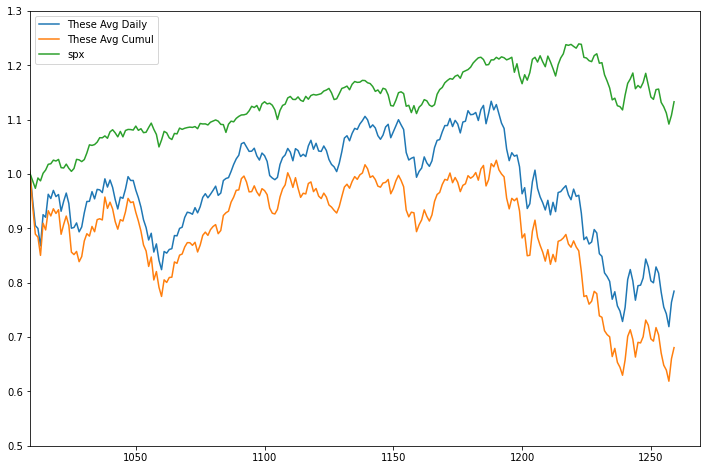

In [9]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.5, 1.3)
plt.legend();

In [10]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [11]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
165,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
166,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
167,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
168,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
169,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [12]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
165,16.26,16.26,16.990,14.00
166,15.26,15.26,16.399,15.12
167,15.24,15.24,15.860,14.77
168,13.73,13.73,15.430,13.62
169,14.02,14.02,14.160,13.81


In [13]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
165,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
166,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
167,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
168,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
169,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.990836
Name: HighMult, dtype: float64


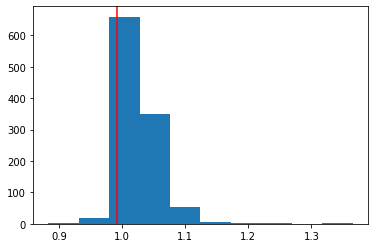

In [14]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0135171800064904


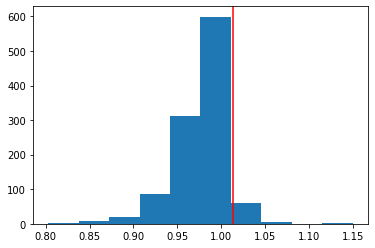

In [15]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [16]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [17]:
get_hilo_mult(rblx)

(1.0135171800064904, 0.9908358273334985)

In [18]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.009482218580051, 0.9934637572220747)

In [19]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [20]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
165,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
166,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
167,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
168,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
169,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [21]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [22]:
get_hilo_mults(rblx)

(1.0097431964446055,
 0.9922140708149245,
 1.0173688598666366,
 0.9883384557505733)

In [23]:
get_hilo_mults(aapl)

(1.0080916280357717, 0.996147386634383, 1.0109426848440097, 0.9891062825157659)

In [24]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.008092,0.996147,1.010943,0.989106
1,ABMD,1.004659,0.997225,1.005986,0.996765
2,ABNB,1.006382,0.994851,1.010974,0.982435
3,ADSK,1.005411,0.996177,1.008181,0.992697
4,AMD,1.013584,0.993357,1.013900,0.990717


In [25]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv